In [1]:
#tutorial of prophet python 
#https://www.youtube.com/watch?v=2vF2xTUXJwM
import pandas as pd 
from prophet import Prophet

#not in used yet 
import matplotlib.pyplot as plt

#evaluate the model 
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error, mean_squared_error

Importing plotly failed. Interactive plots will not work.


# 1.Read CSV

Reading from OrganizedData.zip  (Chris) __________      Original data source :BuildingFinale_FINALE.csv (Sohan) 

In [2]:
#0
building0 = pd.read_csv("Building0.csv")
b0_train = pd.read_csv("Building0Train.csv")
b0_test = pd.read_csv("Building0Test.csv")

#1
building1 = pd.read_csv("Building1.csv")
b1_train = pd.read_csv("Building1Train.csv")
b1_test = pd.read_csv("Building1Test.csv")

#3
building3 = pd.read_csv("Building3.csv")
b3_train = pd.read_csv("Building3Train.csv")
b3_test = pd.read_csv("Building3Test.csv")

#4
building4 = pd.read_csv("Building4.csv")
b4_train = pd.read_csv("Building4Train.csv")
b4_test = pd.read_csv("Building4Test.csv")

#5
building5 = pd.read_csv("Building5.csv")
b5_train = pd.read_csv("Building5Train.csv")
b5_test = pd.read_csv("Building5Test.csv")

#6
building6 = pd.read_csv("Building6.csv")
b6_train = pd.read_csv("Building6Train.csv")
b6_test = pd.read_csv("Building6Test.csv")

# 2. Change df format to (date,value)

In [3]:
#train
train_b0 = b0_train[ ["datetime","series_value"]]
train_b0.columns=["ds","y"]

train_b1 = b1_train[ ["datetime","series_value"]]
train_b1.columns=["ds","y"]

train_b3 = b3_train[ ["datetime","series_value"]]
train_b3.columns=["ds","y"]

train_b4 = b4_train[ ["datetime","series_value"]]
train_b4.columns=["ds","y"]

train_b5 = b5_train[ ["datetime","series_value"]]
train_b5.columns=["ds","y"]

train_b6 = b6_train[ ["datetime","series_value"]]
train_b6.columns=["ds","y"]

#test 
test_b0 = b0_test[["datetime","series_value"]]
test_b0.columns=["ds","y"]
print("the len of test b0 : " , len(test_b0))

test_b1 = b1_test[["datetime","series_value"]]
test_b1.columns=["ds","y"]
print("the len of test b1 : " , len(test_b1))

test_b3 = b3_test[["datetime","series_value"]]
test_b3.columns=["ds","y"]
print("the len of test b3 : " , len(test_b3))

test_b4 = b4_test[["datetime","series_value"]]
test_b4.columns=["ds","y"]
print("the len of test b4 : " , len(test_b4))

test_b5 = b5_test[["datetime","series_value"]]
test_b5.columns=["ds","y"]
print("the len of test b5 : " , len(test_b5))

test_b6 = b6_test[["datetime","series_value"]]
test_b6.columns=["ds","y"]
print("the len of test b6 : " , len(test_b6))


the len of test b0 :  6586
the len of test b1 :  6586
the len of test b3 :  6586
the len of test b4 :  6586
the len of test b5 :  6586
the len of test b6 :  6586


# 3. Model training

In [4]:
#  m = Prophet()
#  m.fit(train)
model_building0 = Prophet()
model_building0.fit(train_b0)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [5]:
#building1
model_building1 = Prophet()
model_building1.fit(train_b1)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [6]:
#building3
model_building3 = Prophet()
model_building3.fit(train_b3)

In [7]:
#building4
model_building4 = Prophet()
model_building4.fit(train_b4)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [8]:
#building5
model_building5 = Prophet()
model_building5.fit(train_b5)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [9]:
#building6
model_building6 = Prophet()
model_building6.fit(train_b6)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


# 4. Making Future dataframes

In [10]:
#use trained model to make predictions on future dates 
#buidling future data 
future_b0 = model_building0.make_future_dataframe(periods=6586,freq="H")
future_b1 = model_building1.make_future_dataframe(periods=6586,freq="H")
future_b3 = model_building3.make_future_dataframe(periods=6586,freq="H")
future_b4 = model_building4.make_future_dataframe(periods=6586,freq="H")
future_b5 = model_building5.make_future_dataframe(periods=6586,freq="H")
future_b6 = model_building6.make_future_dataframe(periods=6586,freq="H")

In [11]:
#future_b0.iloc[-6586:] #building 0 
#future_b1.iloc[-6586:]  #building 1
#future_b3.iloc[-6586:]  #building 3 
#future_b4.iloc[-6586:] #building 4 
#future_b5.iloc[-6586:] #building 4 
#future_b6.iloc[-6586:] #building 4 

# 5. Predict on future dataframes

In [12]:
#make prediction based on future dataframe 
forecast_b0 = model_building0.predict(future_b0)
forecast_b1 = model_building1.predict(future_b1)
forecast_b3 = model_building3.predict(future_b3)
forecast_b4 = model_building4.predict(future_b4)
forecast_b5 = model_building5.predict(future_b5)
forecast_b6 = model_building6.predict(future_b6)

# Building 0 

## Prediction vs Actual 

In [13]:
print("building 0 prediction result  ")
print ( forecast_b0[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-6586:] ) 

print("")
print("building 0 actual value ")
print( test_b0 )

building 0 prediction result  
                       ds        yhat  yhat_lower  yhat_upper
30613 2020-01-01 00:00:00  114.904540   15.198733  216.561474
30614 2020-01-01 01:00:00   83.944551  -18.302913  190.399923
30615 2020-01-01 02:00:00   76.833463  -27.675739  180.874017
30616 2020-01-01 03:00:00   87.691701  -19.410635  191.764942
30617 2020-01-01 04:00:00  107.710258   -7.796983  218.201443
...                   ...         ...         ...         ...
37194 2020-10-01 05:00:00  147.477235  -46.142601  339.196663
37195 2020-10-01 06:00:00  168.339337  -32.767865  363.567029
37196 2020-10-01 07:00:00  182.939581  -18.377850  377.768882
37197 2020-10-01 08:00:00  186.849929    4.476712  387.025102
37198 2020-10-01 09:00:00  179.335638   -8.170314  398.003783

[6586 rows x 4 columns]

building 0 actual value 
                  ds        y
0     1/01/2020 0:00  160.200
1     1/01/2020 1:00  161.175
2     1/01/2020 2:00  161.925
3     1/01/2020 3:00  158.250
4     1/01/2020 4:00  15

## Visualisation

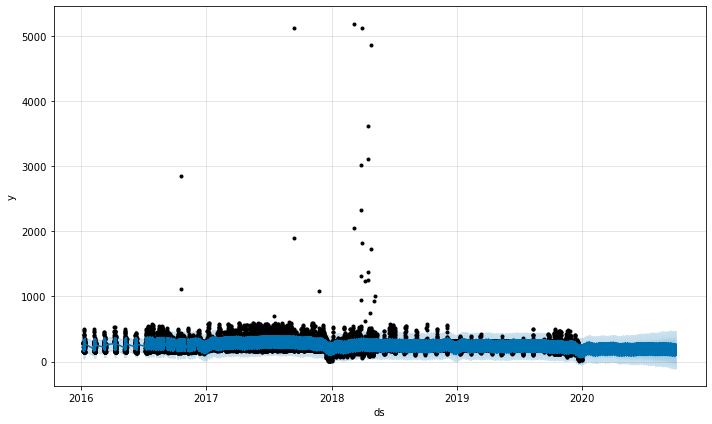

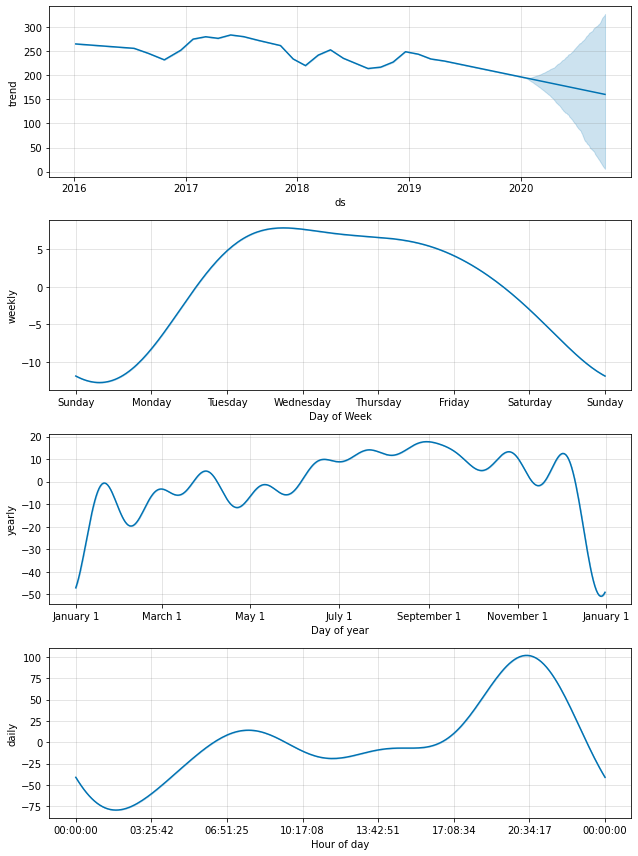

In [14]:
# plot the prediction 
fig_b0 = model_building0.plot(forecast_b0)
#plot predictions 
fig_b0_2 = model_building0.plot_components(forecast_b0)

# Building 1 

## Prediction vs Actual # 

In [15]:
print("building 1 prediction result  ")
print ( forecast_b1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-6586:] ) 

print("")
print("building 1 actual value ")
print( test_b1 )

building 1 prediction result  
                       ds      yhat  yhat_lower  yhat_upper
8533  2020-01-01 00:00:00  7.567703    2.095543   13.177672
8534  2020-01-01 01:00:00  7.308570    1.125920   12.775235
8535  2020-01-01 02:00:00  7.226684    2.044483   13.180400
8536  2020-01-01 03:00:00  7.504570    1.394609   13.284703
8537  2020-01-01 04:00:00  8.111018    2.473185   13.260585
...                   ...       ...         ...         ...
15114 2020-10-01 05:00:00 -0.617883  -20.199688   19.370247
15115 2020-10-01 06:00:00  0.407956  -18.811644   20.463755
15116 2020-10-01 07:00:00  1.648202  -18.312480   21.319239
15117 2020-10-01 08:00:00  3.048839  -16.825404   22.639908
15118 2020-10-01 09:00:00  4.381524  -15.471950   24.960154

[6586 rows x 4 columns]

building 1 actual value 
                  ds       y
0     1/01/2020 0:00   6.175
1     1/01/2020 1:00   6.225
2     1/01/2020 2:00   6.125
3     1/01/2020 3:00   6.025
4     1/01/2020 4:00   5.950
...              ...    

## visualisation

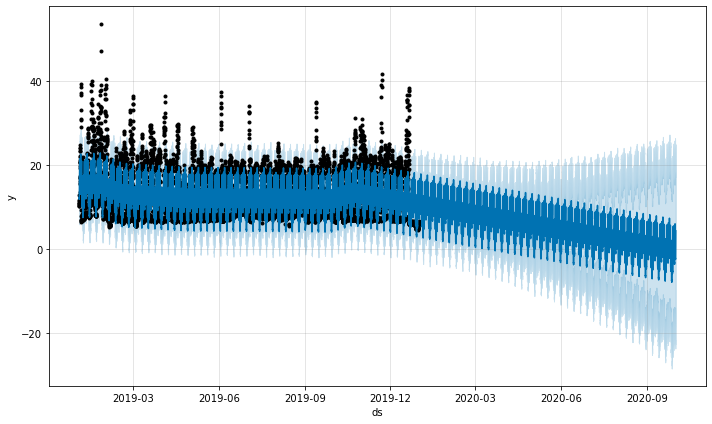

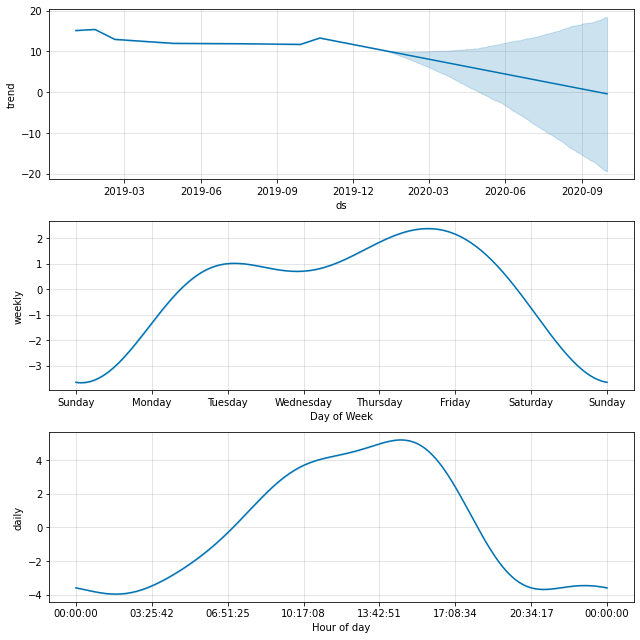

In [16]:
# plot the prediction 
fig_b1 = model_building1.plot(forecast_b1)
#plot predictions 
fig_b1_2 = model_building1.plot_components(forecast_b1)



# Building 3 

## Prediction vs Actual 

In [17]:
print("building 3 prediction result  ")
print ( forecast_b3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-6586:] ) 

print("")
print("building 3 actual value ")
print( test_b3 )

building 3 prediction result  
                       ds        yhat  yhat_lower  yhat_upper
33605 2020-01-01 00:00:00  189.817298  -30.898088  410.032178
33606 2020-01-01 01:00:00  184.961396  -31.561723  415.548752
33607 2020-01-01 02:00:00  184.990745  -31.878058  410.805546
33608 2020-01-01 03:00:00  181.924352  -23.577461  428.169665
33609 2020-01-01 04:00:00  180.082228  -53.784469  411.618107
...                   ...         ...         ...         ...
40186 2020-10-01 05:00:00  248.823258  -15.588608  520.810383
40187 2020-10-01 06:00:00  302.541061   25.097400  571.907712
40188 2020-10-01 07:00:00  396.798631  140.343622  678.745269
40189 2020-10-01 08:00:00  511.995742  211.421930  777.522158
40190 2020-10-01 09:00:00  616.164750  345.642692  887.204540

[6586 rows x 4 columns]

building 3 actual value 
                  ds       y
0     1/01/2020 0:00  252.25
1     1/01/2020 1:00  250.25
2     1/01/2020 2:00  250.75
3     1/01/2020 3:00  249.50
4     1/01/2020 4:00  247.50


## visualisation

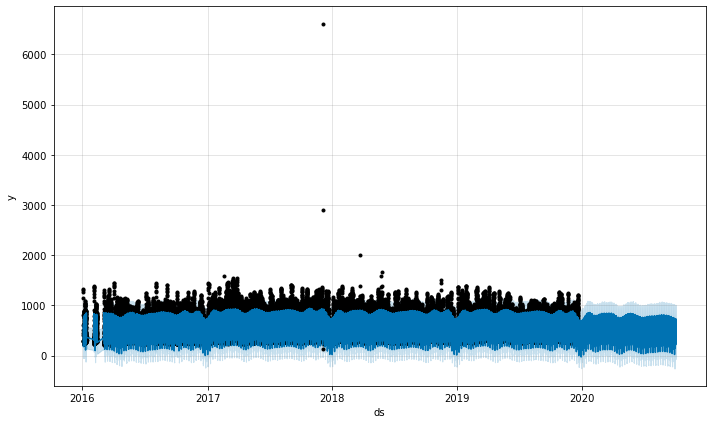

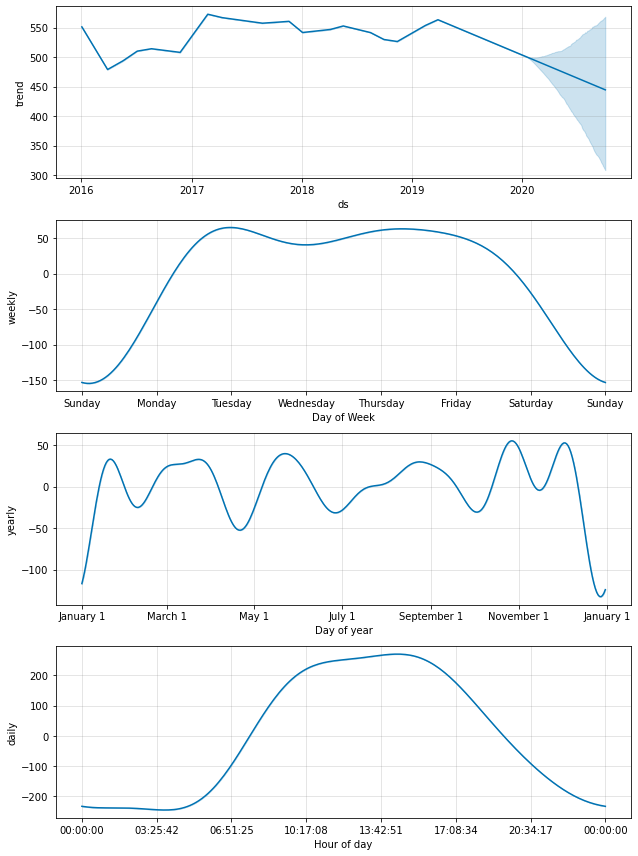

In [18]:
# plot the prediction 
fig_b3 = model_building3.plot(forecast_b3)
#plot predictions 
fig_b3_2 = model_building3.plot_components(forecast_b3)


# Building 4 

## Prediction vs Actual 

In [19]:
print("building 4 prediction result  ")
print ( forecast_b4[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-6586:] ) 

print("")
print("building 4 actual value ")
print( test_b4 )

building 4 prediction result  
                       ds      yhat  yhat_lower  yhat_upper
4353  2020-01-01 00:00:00  1.306578    0.983022    1.615143
4354  2020-01-01 01:00:00  1.325808    1.004433    1.705695
4355  2020-01-01 02:00:00  1.349229    1.002441    1.703746
4356  2020-01-01 03:00:00  1.366233    1.012381    1.725404
4357  2020-01-01 04:00:00  1.373525    1.023606    1.703436
...                   ...       ...         ...         ...
10934 2020-10-01 05:00:00  1.250090    0.916415    1.609080
10935 2020-10-01 06:00:00  1.256521    0.918111    1.620410
10936 2020-10-01 07:00:00  1.262619    0.894076    1.627336
10937 2020-10-01 08:00:00  1.256616    0.863555    1.611981
10938 2020-10-01 09:00:00  1.229629    0.865722    1.603402

[6586 rows x 4 columns]

building 4 actual value 
                  ds         y
0     1/01/2020 0:00  1.244565
1     1/01/2020 1:00  1.250878
2     1/01/2020 2:00  1.274638
3     1/01/2020 3:00  1.264317
4     1/01/2020 4:00  1.269817
...         

## visualisation

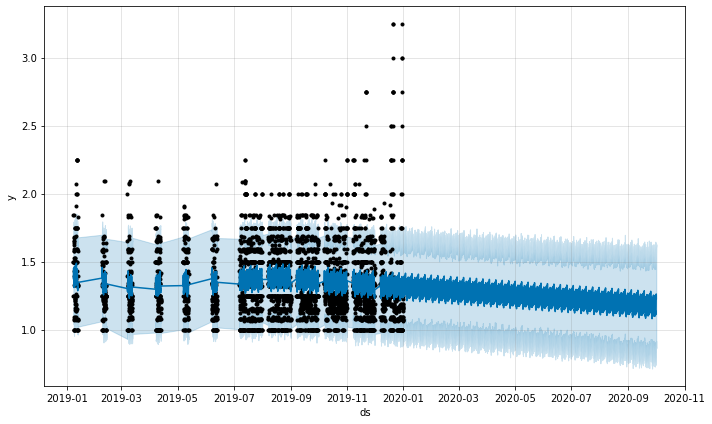

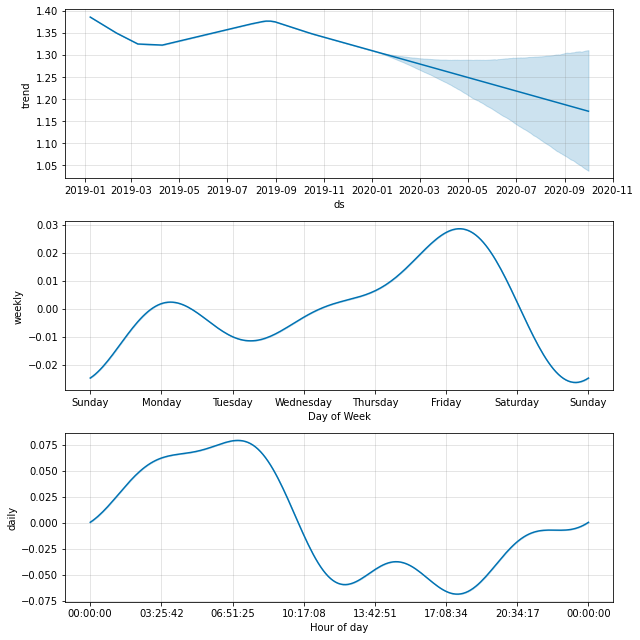

In [20]:
# plot the prediction 
fig_b4 = model_building4.plot(forecast_b4)
#plot predictions 
fig_b4_2 = model_building4.plot_components(forecast_b4)


# Building 5 

## Prediction vs Actual 

In [21]:
print("building 5 prediction result  ")
print ( forecast_b5[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-6586:] ) 

print("")
print("building 5 actual value ")
print( test_b5 )

building 5 prediction result  
                       ds       yhat  yhat_lower  yhat_upper
3806  2020-01-01 00:00:00   3.931503   -0.120100    7.891559
3807  2020-01-01 01:00:00   3.753671    0.295984    7.447890
3808  2020-01-01 02:00:00   3.112825   -0.785680    7.233276
3809  2020-01-01 03:00:00   2.331990   -1.618404    6.177541
3810  2020-01-01 04:00:00   2.576314   -1.219566    6.417782
...                   ...        ...         ...         ...
10387 2020-10-01 05:00:00   3.505025   -3.501438   10.587755
10388 2020-10-01 06:00:00   9.692088    2.765098   16.591722
10389 2020-10-01 07:00:00  17.865922   10.708049   24.715440
10390 2020-10-01 08:00:00  25.013240   17.813508   31.795387
10391 2020-10-01 09:00:00  28.406470   21.392892   35.343444

[6586 rows x 4 columns]

building 5 actual value 
                  ds          y
0     1/01/2020 0:00   3.468750
1     1/01/2020 1:00   3.406250
2     1/01/2020 2:00   3.468750
3     1/01/2020 3:00   3.437500
4     1/01/2020 4:00   3.4

## visualisation

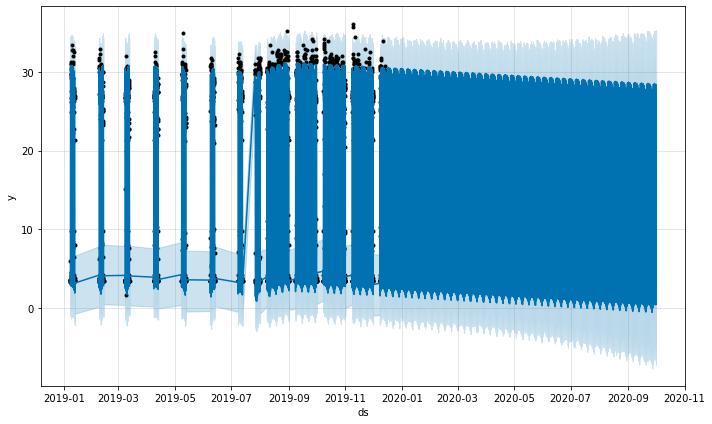

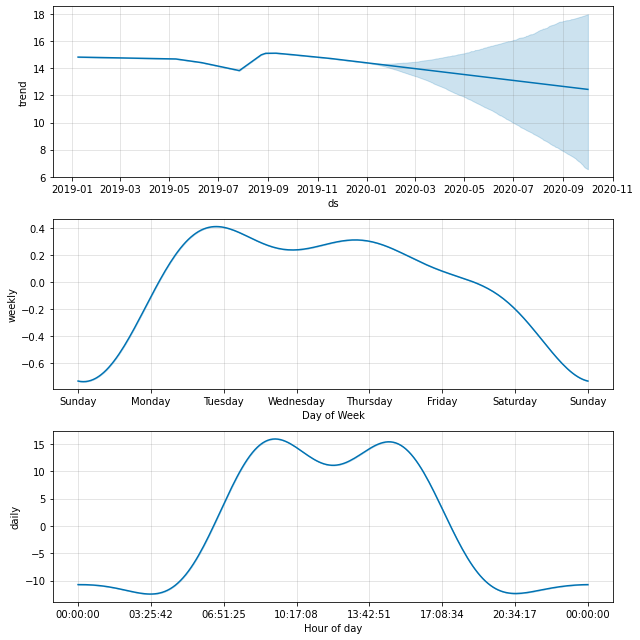

In [22]:
# plot the prediction 
fig_b5 = model_building5.plot(forecast_b5)
#plot predictions 
fig_b5_2 = model_building5.plot_components(forecast_b5)


# Building 6 

## Prediction vs Actual 

In [23]:
print("building 6 prediction result  ")
print ( forecast_b6[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-6586:] ) 

print("")
print("building 6 actual value ")
print( test_b6 )

building 6 prediction result  
                       ds       yhat  yhat_lower  yhat_upper
3828  2020-01-01 00:00:00  28.113890   24.346342   32.060118
3829  2020-01-01 01:00:00  28.130808   24.095840   32.005844
3830  2020-01-01 02:00:00  28.134591   24.473904   31.914159
3831  2020-01-01 03:00:00  28.234840   24.385511   32.065452
3832  2020-01-01 04:00:00  28.513257   24.702972   32.134756
...                   ...        ...         ...         ...
10409 2020-10-01 05:00:00  26.176290    2.072515   48.563082
10410 2020-10-01 06:00:00  26.996721    2.959291   49.986806
10411 2020-10-01 07:00:00  28.112641    3.352548   50.383298
10412 2020-10-01 08:00:00  29.396968    5.223823   51.903425
10413 2020-10-01 09:00:00  30.569397    5.975674   52.815181

[6586 rows x 4 columns]

building 6 actual value 
                  ds      y
0     1/01/2020 0:00  25.00
1     1/01/2020 1:00  26.00
2     1/01/2020 2:00  25.90
3     1/01/2020 3:00  25.70
4     1/01/2020 4:00  25.50
...              .

## visualisation

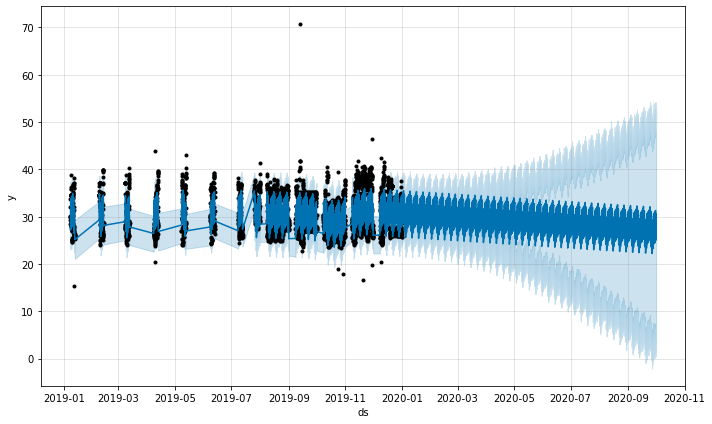

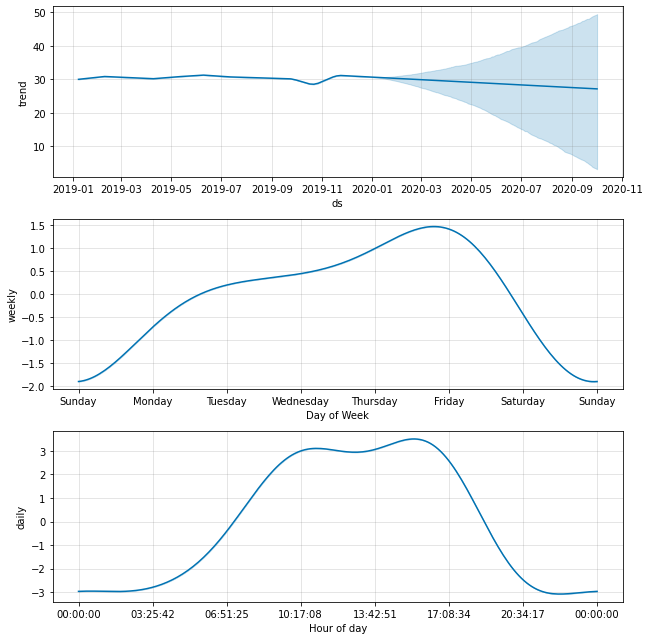

In [24]:
# plot the prediction 
fig_b6 = model_building6.plot(forecast_b6)
#plot predictions 
fig_b6_2 = model_building6.plot_components(forecast_b6)

In [25]:
prediction_b0 = forecast_b0["yhat"][-6586:]
prediction_b1 = forecast_b1["yhat"][-6586:]
prediction_b3 = forecast_b3["yhat"][-6586:]
prediction_b4 = forecast_b4["yhat"][-6586:]
prediction_b5 = forecast_b5["yhat"][-6586:]
prediction_b6 = forecast_b6["yhat"][-6586:]

In [26]:
actual_value_b0 = test_b0["y"]
actual_value_b1 = test_b1["y"]
actual_value_b3 = test_b3["y"]
actual_value_b4 = test_b4["y"]
actual_value_b5 = test_b5["y"]
actual_value_b6 = test_b6["y"]

# RMSE/MSE/MEAN Report

In [27]:
print("Building 0")
print("Root Mean Squared Error between actual and predicted values: ",rmse(prediction_b0,actual_value_b0))
print("Mean Square Error : ", mean_absolute_error(prediction_b0, actual_value_b0) )
print("Mean Test:", actual_value_b0.mean())
print("Mean Prediction:",prediction_b0.mean())
print("")
print("Building 1")
print("Root Mean Squared Error between actual and predicted values: ",rmse(prediction_b1,actual_value_b1))
print("Mean Square Error : ", mean_absolute_error(prediction_b1, actual_value_b1) )
print("Mean Test:", actual_value_b1.mean())
print("Mean Prediction:",prediction_b1.mean())
print("")
print("Building 3")
print("Root Mean Squared Error between actual and predicted values: ",rmse(prediction_b3,actual_value_b3))
print("Mean Square Error : ", mean_absolute_error(prediction_b3, actual_value_b3) )
print("Mean Test:", actual_value_b3.mean())
print("Mean Prediction:",prediction_b3.mean())
print("")
print("Building 4")
print("Root Mean Squared Error between actual and predicted values: ",rmse(prediction_b4,actual_value_b4))
print("Mean Square Error : ", mean_absolute_error(prediction_b4, actual_value_b4) )
print("Mean Test:", actual_value_b4.mean())
print("Mean Prediction:",prediction_b4.mean())
print("")
print("Building 5")
print("Root Mean Squared Error between actual and predicted values: ",rmse(prediction_b5,actual_value_b5))
print("Mean Square Error : ", mean_absolute_error(prediction_b5, actual_value_b5) )
print("Mean Test:", actual_value_b5.mean())
print("Mean Prediction:",prediction_b5.mean())
print("")
print("Building 6")
print("Root Mean Squared Error between actual and predicted values: ",rmse(prediction_b6,actual_value_b6))
print("Mean Square Error : ", mean_absolute_error(prediction_b6, actual_value_b6) )
print("Mean Test:", actual_value_b6.mean())
print("Mean Prediction:",prediction_b6.mean())

Building 0
Root Mean Squared Error between actual and predicted values:  82.40903167829333
Mean Square Error :  44.76138887287979
Mean Test: 173.35827975262933
Mean Prediction: 179.26780739159364

Building 1
Root Mean Squared Error between actual and predicted values:  6.345089263700461
Mean Square Error :  5.420828169389214
Mean Test: 10.07824757451865
Mean Prediction: 5.026930357341988

Building 3
Root Mean Squared Error between actual and predicted values:  143.66643367293733
Mean Square Error :  110.7564686196952
Mean Test: 418.07048506512297
Mean Prediction: 475.0747589014732

Building 4
Root Mean Squared Error between actual and predicted values:  0.25405539488554935
Mean Square Error :  0.179128320351755
Mean Test: 1.3124283400227597
Mean Prediction: 1.2408236768098686

Building 5
Root Mean Squared Error between actual and predicted values:  3.006822425980122
Mean Square Error :  2.1348956530414473
Mean Test: 14.208257076735887
Mean Prediction: 13.422209392380877

Building 6
Roo